Using device: cuda
Preparing training data...

------------------------------------------------------------
Starting PINN Training
------------------------------------------------------------
Total steps: 20000
Learning rate: 0.001
Network architecture: [ 2 32 32  1]
Boundary points: 100
Collocation points: 10000
------------------------------------------------------------



/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:179.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Iteration     0/20000 | Training Loss: 17.512596 | Testing Loss: 0.287374 | Time: 1.02s
Iteration  2000/20000 | Training Loss: 0.002886 | Testing Loss: 0.036434 | Time: 11.48s
Iteration  4000/20000 | Training Loss: 0.000856 | Testing Loss: 0.035466 | Time: 21.77s
Iteration  6000/20000 | Training Loss: 0.000371 | Testing Loss: 0.035658 | Time: 32.09s
Iteration  8000/20000 | Training Loss: 0.000284 | Testing Loss: 0.035781 | Time: 42.05s
Iteration 10000/20000 | Training Loss: 0.000123 | Testing Loss: 0.035640 | Time: 52.23s
Iteration 12000/20000 | Training Loss: 0.000104 | Testing Loss: 0.035619 | Time: 62.43s
Iteration 14000/20000 | Training Loss: 0.000087 | Testing Loss: 0.036302 | Time: 72.59s
Iteration 16000/20000 | Training Loss: 0.000066 | Testing Loss: 0.035579 | Time: 82.78s
Iteration 18000/20000 | Training Loss: 0.000056 | Testing Loss: 0.035866 | Time: 93.06s

------------------------------------------------------------
Training completed in 102.99 seconds
---------------------

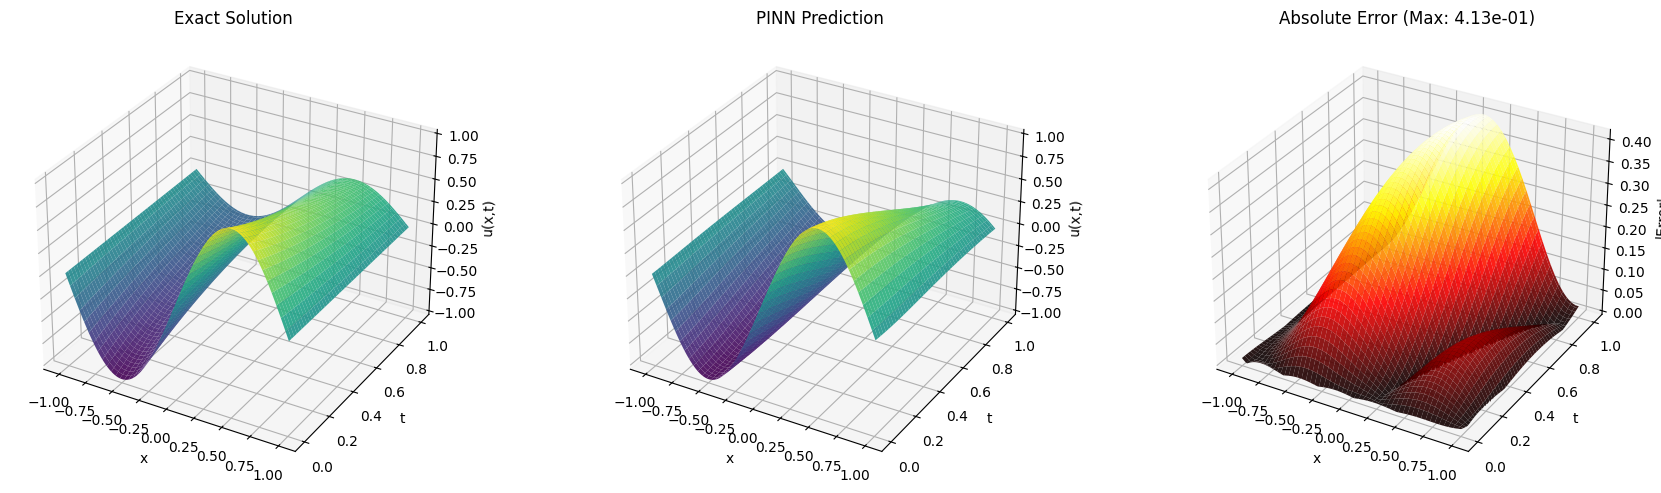


------------------------------------------------------------
Error Statistics
------------------------------------------------------------
Max absolute error:  4.130181e-01
Mean absolute error: 1.394552e-01
L2 relative error:   4.075830e-01
------------------------------------------------------------



In [3]:
import torch
import numpy as np
from PINN import PINNSolver

# Define the exact solution
def exact_solution(x, t):
    """Exact solution: u(x,t) = exp(-t) * sin(πx)"""
    return torch.exp(-t) * torch.sin(np.pi * x)

# Define the PDE equation (residual form)
def pde_equation(x_col, u_t, u_xx):
    """
    PDE residual: ∂u/∂t - ∂²u/∂x² - f(x,t) = 0
    where f(x,t) = exp(-t) * (sin(πx) - π²sin(πx))
    """
    x = x_col[:, 0:1]  # Extract x coordinate
    t = x_col[:, 1:2]  # Extract t coordinate

    # Source term
    f = torch.exp(-t) * (torch.sin(np.pi * x) - np.pi**2 * torch.sin(np.pi * x))

    # PDE residual
    residual = u_t - u_xx + f

    return residual

# Create PINN solver
pinn_solver = PINNSolver(
    steps=20000,
    learning_rate=1e-3,
    layers=np.array([2, 32, 32, 1]),  # 2 inputs (x,t), 2 hidden layers, 1 output (u)
    x_min=-1.0,
    x_max=1.0,
    t_min=0.0,
    t_max=1.0,
    total_points_x=200,
    total_points_t=100,
    num_boundary_points=100,
    num_collocation_points=10000,
    pde_equation=pde_equation,
    exact_solution=exact_solution
)

# Prepare training data
print("Preparing training data...")
pinn_solver.prepare_training_data()

# Train the model
pinn_solver.train()

# Visualize results
print("Generating visualizations...")
pinn_solver.visualize_results()
